In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Load the dataset
data = pd.read_csv('/content/parkinsons.data', delimiter=',')

# Check the first few rows to confirm the data structure
print(data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [3]:
# Check for NaN values and handle them (if any)
data = data.dropna()


In [61]:
X=data.drop(columns = ['name', 'status'], axis=1)
y=data['status']

In [62]:
X.head()



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [63]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [82]:
y_train


,status
5,1
135,1
122,1
167,0
85,1
...,...
106,1
14,1
92,1
179,1


In [83]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [109]:
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Bagging KNN": BaggingClassifier(estimator=KNeighborsClassifier()),
    "Bagging DT": BaggingClassifier(estimator=DecisionTreeClassifier()),
}

In [110]:
# Train and evaluate each model
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Append results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision
    })



In [111]:
# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1 Score   Recall  Precision
0        Random Forest  0.948718  0.969697  1.00000   0.941176
1                  KNN  0.820513  0.892308  0.90625   0.878788
2        Decision Tree  0.923077  0.953846  0.96875   0.939394
3                  SVM  0.846154  0.911765  0.96875   0.861111
4  Logistic Regression  0.897436  0.941176  1.00000   0.888889
5          Bagging KNN  0.820513  0.892308  0.90625   0.878788
6           Bagging DT  0.897436  0.937500  0.93750   0.937500


In [112]:
# Select the best model based on accuracy
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
print(best_model_name)


Random Forest


In [113]:
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)
print("Shape of X_test_scaled:", X_test_scaled.shape)
# For a multi-class problem, shap_values will be a list of arrays, one for each class
print("Shape of shap_values for each class:", shap_values.shape)

# Alternatively, you can inspect each class's SHAP values:
for i in range(len(shap_values)):
    print(f"Shape of shap_values for class {i}:", shap_values[i].shape)


Shape of X_test_scaled: (39, 22)
Shape of shap_values for each class: (39, 22, 2)
Shape of shap_values for class 0: (22, 2)
Shape of shap_values for class 1: (22, 2)
Shape of shap_values for class 2: (22, 2)
Shape of shap_values for class 3: (22, 2)
Shape of shap_values for class 4: (22, 2)
Shape of shap_values for class 5: (22, 2)
Shape of shap_values for class 6: (22, 2)
Shape of shap_values for class 7: (22, 2)
Shape of shap_values for class 8: (22, 2)
Shape of shap_values for class 9: (22, 2)
Shape of shap_values for class 10: (22, 2)
Shape of shap_values for class 11: (22, 2)
Shape of shap_values for class 12: (22, 2)
Shape of shap_values for class 13: (22, 2)
Shape of shap_values for class 14: (22, 2)
Shape of shap_values for class 15: (22, 2)
Shape of shap_values for class 16: (22, 2)
Shape of shap_values for class 17: (22, 2)
Shape of shap_values for class 18: (22, 2)
Shape of shap_values for class 19: (22, 2)
Shape of shap_values for class 20: (22, 2)
Shape of shap_values for 

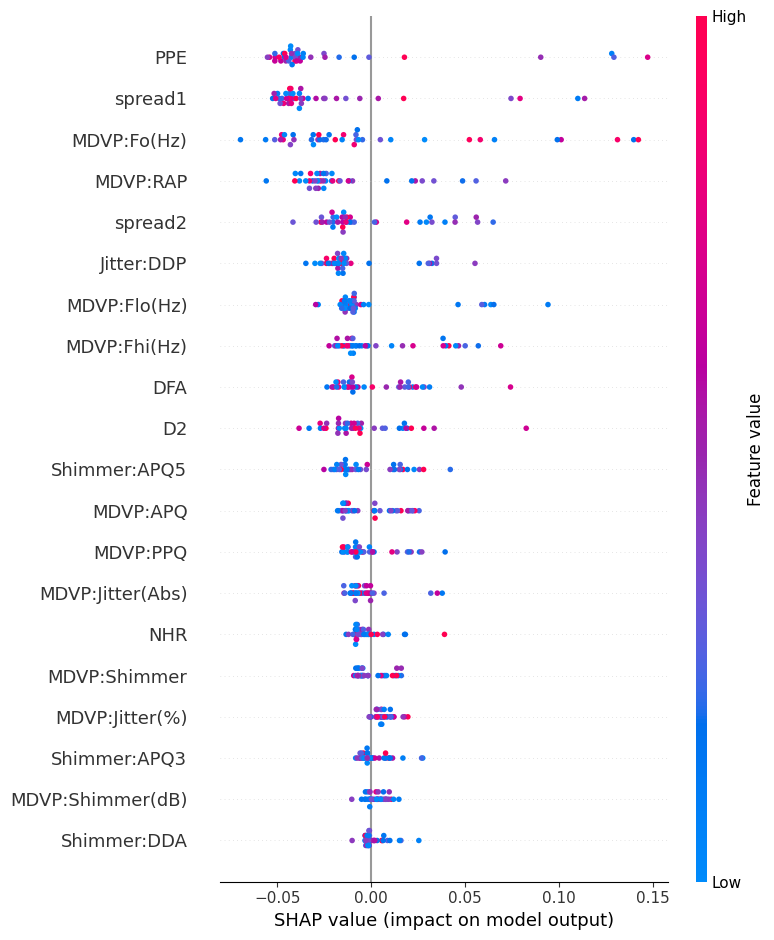

In [114]:
shap_values_class_0 = shap_values[:, :, 0]  # Shape: (39, 22)

# Create the summary plot for class 0
shap.summary_plot(shap_values_class_0, X_test_scaled, feature_names=X.columns)



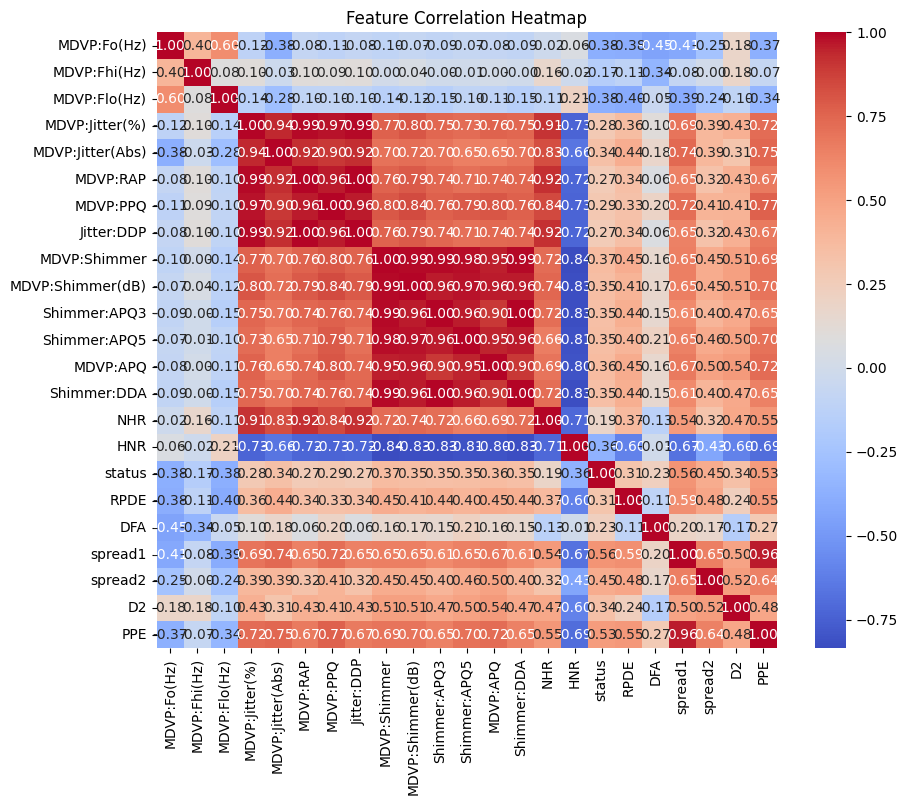

In [115]:
# Drop non-numeric columns (e.g., 'name', 'status') before calculating correlation
numeric_data = data.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

